(100, 100)


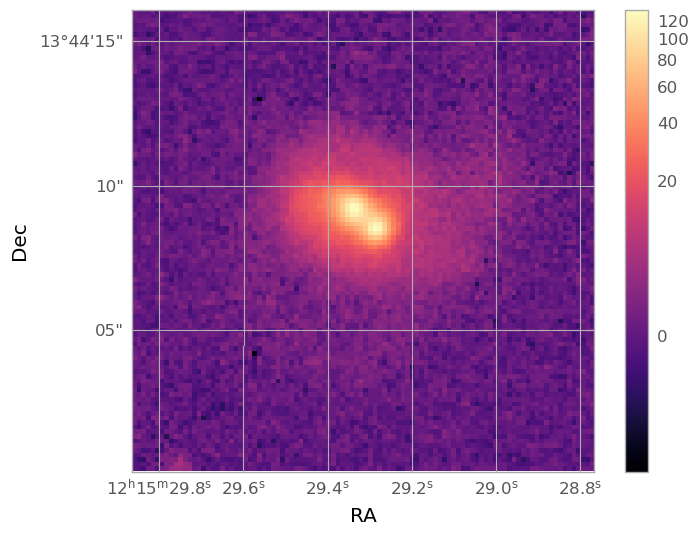

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from astropy.visualization import astropy_mpl_style
from astropy.io import fits
from astropy.visualization.mpl_normalize import simple_norm
from matplotlib.colors import LogNorm, BoundaryNorm
from astropy.wcs import WCS



plt.style.use(astropy_mpl_style)


fits_image_filename = 'agn.fits'

f = fits.open(fits_image_filename)  

fits.info = (fits_image_filename)
image_data = fits.getdata(fits_image_filename, ext=0)
print(image_data.shape) # same code as before

wcs = WCS(f[0].header) # where I wanted to added the WCS

ysize, xsize = image_data.shape

xcorner, ycorner = wcs.pixel_to_world_values([0, xsize], [0, ysize]) #tested if the pixel to world worked - and it did :)


fig, ax = plt.subplots(subplot_kw={'projection': wcs})

extent = [xcorner[0], xcorner[1], ycorner[0], ycorner[1]]

ax.imshow(image_data, cmap='viridis', origin='lower', aspect='equal', extent=extent) # new addition to convert the coord system so it is not pixels but WCS


norm = simple_norm(image_data, stretch='log', power=2.0, asinh_a=0.5, min_cut=None, max_cut=None, min_percent=None, max_percent=None, percent=None, clip=False, log_a=100, invalid=-2.0)
# ^ lowkey didnt know if I should take this away but the coord system works with the simplenorm!
ax.set_xlabel('RA')
ax.set_ylabel('Dec')

#labels


plt.imshow(image_data, cmap="magma", norm=norm)
plt.colorbar() #for colorbar




In [73]:
from astropy.io import fits

fits_file = fits.open('agn.fits')

print(fits_file)

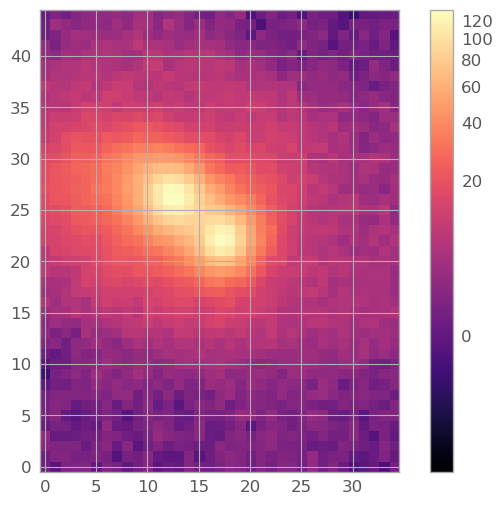

In [74]:
section1 = image_data[30:75, 35:70]

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm





plt.figure()

plt.imshow(section1, origin = 'lower', norm = norm, cmap = 'magma')

plt.colorbar()

plt.show()


In [75]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from astropy.visualization import astropy_mpl_style
from astropy.io import fits
from astropy.visualization.mpl_normalize import simple_norm
from matplotlib.colors import LogNorm, BoundaryNorm
from astropy.wcs import WCS



plt.style.use(astropy_mpl_style)

# Assuming 'agn.fits' is the filename
fits_image_filename = 'agn.fits'

f = fits.open(fits_image_filename)
wcs = WCS(f[0].header)

sky = wcs.pixel_to_world(50,50)

print(sky)


<SkyCoord (ICRS): (ra, dec) in deg
    (183.87212388, 13.73560733)>
